In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

In [3]:
compoundXr=xarray.open_dataset('results/cmip6Compounds.nc')

In [4]:
compoundXr

<xarray.Dataset>
Dimensions:                    (fire: 2, compound: 9, experiment: 2, model: 35, year: 4997)
Coordinates:
  * experiment                 (experiment) object 'piControl' 'ssp585'
  * year                       (year) int64 1 2 3 4 5 ... 6196 6197 6198 6199
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound                   (compound) object 'nEvents' ... 'anyCompound'
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/16)
    nino34EastioSamwinter      (fire, compound, experiment, model, year) float64 ...
    nino34EastioSamsummer      (fire, compound, experiment, model, year) float64 ...
    nino34DmiSamwinter         (fire, compound, experiment, model, year) float64 ...
    nino34DmiSamsummer         (fire, compound, experiment, model, year) float64 ...
    cIndexEastioSamwinter      (fire, compound, model, experiment, year) float64 ...
    cIndexEastioSamsummer      (fire, compound, model, experiment, year) float64 ...
    ...                         ...
    eIndexDmiSamwinter         (fire, compound, model, experiment, year) float64 ...
    eIndexDmiSamsummer         (fire, compound, model, experiment, year) float64 ...
    ecCombinedEastioSamwinter  (fire, compound, model, experiment, year) float64 ...
    ecCombinedEastioSamsummer  (fire, compound, model, experiment, year) float64 ...
    ecCombinedDmiSamwinter     (fire, compound, model, experiment, year) float64 ...
    ecCombinedDmiSamsummer     (fire, compound, model, experiment, year) float64 ...
Attributes:
    indexNames:  ['nino3', 'dmi', 'samSummer']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

In [5]:
mMeanXr=compoundXr.sel(
    experiment='ssp585', 
    year=slice(1850,2099), 
    compound='anyCompound',
    drop=True
).rolling(year=30, min_periods=15, center=True).sum('year').mean('model')

In [6]:
mMeanXr

<xarray.Dataset>
Dimensions:                    (year: 250, fire: 2)
Coordinates:
  * year                       (year) int64 1850 1851 1852 ... 2097 2098 2099
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/16)
    nino34EastioSamwinter      (fire, year) float64 1.914 2.057 ... 0.6 0.5714
    nino34EastioSamsummer      (fire, year) float64 2.343 2.514 ... 2.257 2.143
    nino34DmiSamwinter         (fire, year) float64 1.829 1.943 ... 0.2286
    nino34DmiSamsummer         (fire, year) float64 2.0 2.171 ... 2.029 1.914
    cIndexEastioSamwinter      (fire, year) float64 2.057 2.229 ... 0.8286 0.8
    cIndexEastioSamsummer      (fire, year) float64 2.514 2.743 ... 3.857 3.629
    ...                         ...
    eIndexDmiSamwinter         (fire, year) float64 2.029 2.2 ... 0.02857
    eIndexDmiSamsummer         (fire, year) float64 1.943 2.057 ... 0.4 0.3714
    ecCombinedEastioSamwinter  (fire, year) float64 2.857 3.086 ... 0.8286
    ecCombinedEastioSamsummer  (fire, year) float64 3.257 3.486 ... 3.914 3.686
    ecCombinedDmiSamwinter     (fire, year) float64 2.743 2.971 ... 0.2857
    ecCombinedDmiSamsummer     (fire, year) float64 2.886 3.086 ... 3.886 3.657

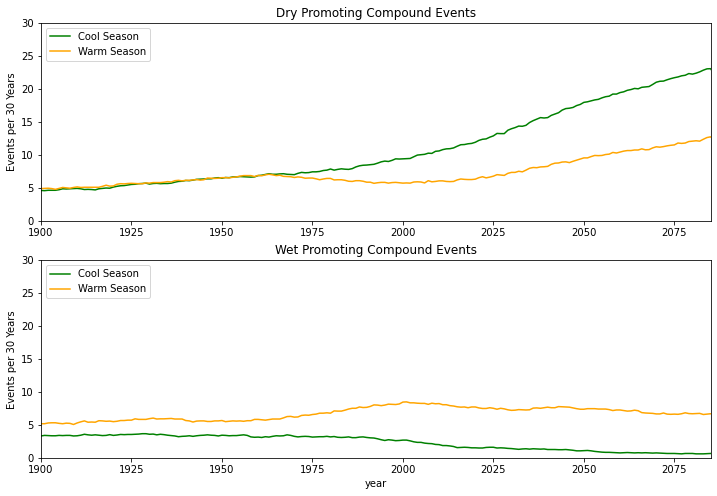

In [14]:
fig=plt.figure(figsize=(12,8))

ax=plt.subplot(2,1,1)

[
    mMeanXr['ecCombinedDmiSam'+iSeason].sel(fire='pos').plot(color=iColor) 
     for iSeason,iColor in {
         ('winter','green'),
         ('summer','orange')
     }
]

plt.legend(['Cool Season','Warm Season'], loc='upper left')



plt.xlabel('')
plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Dry Promoting Compound Events')
plt.ylabel('Events per 30 Years')

ax=plt.subplot(2,1,2)

[mMeanXr['ecCombinedDmiSam'+iSeason].sel(fire='neg').plot(color=iColor) 
     for iSeason,iColor in {
         ('winter','green'),
         ('summer','orange')
     }
]

plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Wet Promoting Compound Events')
plt.ylabel('Events per 30 Years')

plt.legend(['Cool Season','Warm Season'], loc='upper left')

plt.savefig('figures/cmipCompoundEventSummary.pdf',bbox_inches='tight')


In [8]:
eventsXr=xarray.open_dataset('results/obsEvents.nc')

In [9]:
import utils.compound as compound

In [10]:
obsCompoundsXr=compound.compound(eventsXr).sel(
    compound='anyCompound',drop=True
    ).rolling(year=30,  center=True).sum('year')

cIndexEastioSamwinter
cIndexEastioSamsummer
cIndexDmiSamwinter
cIndexDmiSamsummer
eIndexEastioSamwinter
eIndexEastioSamsummer
eIndexDmiSamwinter
eIndexDmiSamsummer
nino4EastioSamwinter
nino4EastioSamsummer
nino4DmiSamwinter
nino4DmiSamsummer
nino34EastioSamwinter
nino34EastioSamsummer
nino34DmiSamwinter
nino34DmiSamsummer
ecCombinedEastioSamwinter
ecCombinedEastioSamsummer
ecCombinedDmiSamwinter
ecCombinedDmiSamsummer
nino3EastioSamwinter
nino3EastioSamsummer
nino3DmiSamwinter
nino3DmiSamsummer


In [11]:
obsCompoundsXr

<xarray.Dataset>
Dimensions:                    (year: 64, fire: 2)
Coordinates:
  * year                       (year) int64 1957 1958 1959 ... 2018 2019 2020
    mode                       int64 0
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/24)
    cIndexEastioSamwinter      (fire, year) float64 nan nan nan ... nan nan nan
    cIndexEastioSamsummer      (fire, year) float64 nan nan nan ... nan nan nan
    cIndexDmiSamwinter         (fire, year) float64 nan nan nan ... nan nan nan
    cIndexDmiSamsummer         (fire, year) float64 nan nan nan ... nan nan nan
    eIndexEastioSamwinter      (fire, year) float64 nan nan nan ... nan nan nan
    eIndexEastioSamsummer      (fire, year) float64 nan nan nan ... nan nan nan
    ...                         ...
    ecCombinedDmiSamwinter     (fire, year) float64 nan nan nan ... nan nan nan
    ecCombinedDmiSamsummer     (fire, year) float64 nan nan nan ... nan nan nan
    nino3EastioSamwinter       (fire, year) float64 nan nan nan ... nan nan nan
    nino3EastioSamsummer       (fire, year) float64 nan nan nan ... nan nan nan
    nino3DmiSamwinter          (fire, year) float64 nan nan nan ... nan nan nan
    nino3DmiSamsummer          (fire, year) float64 nan nan nan ... nan nan nan
Attributes:
    indexNames:  ['cIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

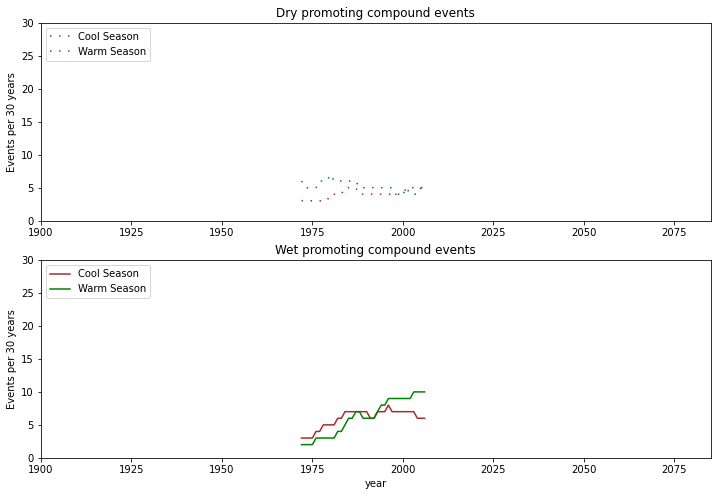

In [12]:
fig=plt.figure(figsize=(12,8))

ax=plt.subplot(2,1,1)

[
    obsCompoundsXr['ecCombinedDmiSam'+iSeason].sel(fire='pos').plot(color=iColor, dashes=(1,5)) 
     for iSeason,iColor in {
         ('winter','brown'),
         ('summer','green')
     }
]

plt.legend(['Cool Season','Warm Season'], loc='upper left')

plt.xlabel('')
plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Dry promoting compound events')
plt.ylabel('Events per 30 years')

ax=plt.subplot(2,1,2)

[
    obsCompoundsXr['ecCombinedDmiSam'+iSeason].sel(fire='neg').plot(color=iColor) 
     for iSeason,iColor in {
         ('winter','brown'),
         ('summer','green')
     }
]

plt.ylim([0,30])
plt.xlim([1900,2085])
plt.title('Wet promoting compound events')
plt.ylabel('Events per 30 years')

plt.legend(['Cool Season','Warm Season'], loc='upper left')

